Show how to a microscope field of view with many microtubules.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../")
import tqdm

import anamic

import numpy as np
import matplotlib.pyplot as plt

/home/hadim/local/conda/envs/ws/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


In [2]:
# We pick the values of the parameters from a distribution.
floating_parameters = {}

floating_parameters['n_pf'] = {}
floating_parameters['n_pf']['values'] = [11, 12, 13, 14, 15]
floating_parameters['n_pf']['prob'] = [0.05, 0.05, 0.3, 0.1, 0.5]

floating_parameters['mt_length_nm'] = {}
floating_parameters['mt_length_nm']['values'] = np.arange(500, 5000)
floating_parameters['mt_length_nm']['prob'] = 'uniform'

floating_parameters['taper_length_nm'] = {}
floating_parameters['taper_length_nm']['values'] = np.arange(0, 3000)
floating_parameters['taper_length_nm']['prob'] = 'uniform'

floating_parameters['labeling_ratio'] = {}
floating_parameters['labeling_ratio']['values'] = [0.08, 0.09, 0.10, 0.11, 0.12, 0.13]
floating_parameters['labeling_ratio']['prob'] = 'uniform'

# Fixed parameters
parameters = {}
parameters['pixel_size'] = 110  # nm/pixel
parameters['x_offset'] = 2000  # nm
parameters['y_offset'] = 2000  # nm
parameters['psf_size'] = 135  # nm

n_microtubules_to_sample = 100000
parameters_list = anamic.fov.sample_parameters(n_microtubules_to_sample, parameters, floating_parameters)

In [4]:
# Common Parameters
pixel_size = parameters['pixel_size']
image_size_pixel = 512
n_images = 1

# Per image parameters
image_parameters = {}
image_parameters['n_mt'] = {}
image_parameters['n_mt']['values'] = np.arange(10, 11)
image_parameters['n_mt']['prob'] = 'uniform'

image_parameters['signal_mean'] = {}
image_parameters['signal_mean']['values'] = {'loc': 700, 'scale': 10}
image_parameters['signal_mean']['prob'] = 'normal'

image_parameters['signal_std'] = {}
image_parameters['signal_std']['values'] = {'loc': 100, 'scale': 1}
image_parameters['signal_std']['prob'] = 'normal'

image_parameters['bg_mean'] = {}
image_parameters['bg_mean']['values'] = {'loc': 500, 'scale': 10}
image_parameters['bg_mean']['prob'] = 'normal'

image_parameters['bg_std'] = {}
image_parameters['bg_std']['values'] = {'loc': 24, 'scale': 1}
image_parameters['bg_std']['prob'] = 'normal'

image_parameters['noise_factor'] = {}
image_parameters['noise_factor']['values'] = {'loc': 1, 'scale': 0.1}
image_parameters['noise_factor']['prob'] = 'normal'

for i in tqdm.tqdm_notebook(range(n_images), total=n_images):
    image, masks = anamic.fov.create_fov(image_size_pixel, pixel_size, parameters_list, image_parameters)

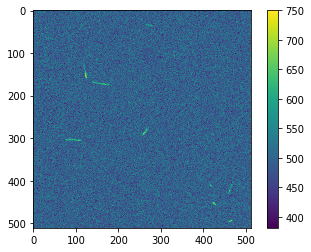

In [5]:
plt.imshow(image)
plt.colorbar()

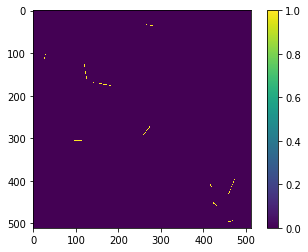

In [6]:
plt.imshow(masks.max(axis=0))
plt.colorbar()